<a href="https://colab.research.google.com/github/ZoubirCHATTI/08_Machin_Learning/blob/main/03_MNIST_images_classification/01_MNIST_classification_DNN_FUNCTIONAL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Loading data
(train_data, train_labels), (test_data, test_labels)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#Pirnting data properties
print(f"train_data: {train_data.shape}")
print(f"train_labels: {train_labels.shape}")
print(f"test_data: {test_data.shape}")
print(f"test_labels: {test_labels.shape}")

train_data: (60000, 28, 28)
train_labels: (60000,)
test_data: (10000, 28, 28)
test_labels: (10000,)


In [6]:
#Transforming labels to categorical
Y_train=to_categorical(train_labels)
Y_test=to_categorical(test_labels)

In [7]:
#Labels properties after vectorizing
print("Y_train: {}".format(Y_train.shape))
print("Y_test: {}".format(Y_test.shape))

Y_train: (60000, 10)
Y_test: (10000, 10)


In [20]:
#Normalizing images
train_data=train_data.astype('float32')/train_data.max()
test_data=test_data.astype('float32')/test_data.max()

In [33]:
#Functional model mounting
inputs=Input(shape=(28, 28,1))
x=Flatten()(inputs)
x=Dense(64, activation='relu')(x)
x=Dense(32, activation='relu')(x)
outputs=Dense(10, activation='softmax')(x)
model=Model(inputs=inputs, outputs=outputs)

In [34]:
#Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Defining stop condition
early_stop=EarlyStopping(monitor='val_loss', patience=3)

In [35]:
#Model training
history=model.fit(train_data, Y_train, epochs=15, validation_split=0.2, callbacks=[early_stop])

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7942 - loss: 0.1273 - val_accuracy: 0.9426 - val_loss: 0.0378
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9455 - loss: 0.0357 - val_accuracy: 0.9570 - val_loss: 0.0285
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9649 - loss: 0.0248 - val_accuracy: 0.9663 - val_loss: 0.0239
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9725 - loss: 0.0197 - val_accuracy: 0.9677 - val_loss: 0.0213
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9767 - loss: 0.0157 - val_accuracy: 0.9693 - val_loss: 0.0215
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9800 - loss: 0.0136 - val_accuracy: 0.9716 - val_loss: 0.0202
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0128 - val_accuracy: 0.9700 - val_loss: 0.0212
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0111 - 

In [38]:
#Model evaluation
loss, accuracy=model.evaluate(test_data, Y_test, verbose=2)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 - 1s - 2ms/step - accuracy: 0.9726 - loss: 0.0200
Loss: 0.01996159926056862
Accuracy: 0.972599983215332


In [40]:
dictionary=history.history
loss=dictionary['loss']
val_loss=dictionary['val_loss']
accuracy=dictionary['accuracy']
val_accuracy=dictionary['val_accuracy']
epochs=range(1, len(loss)+1)

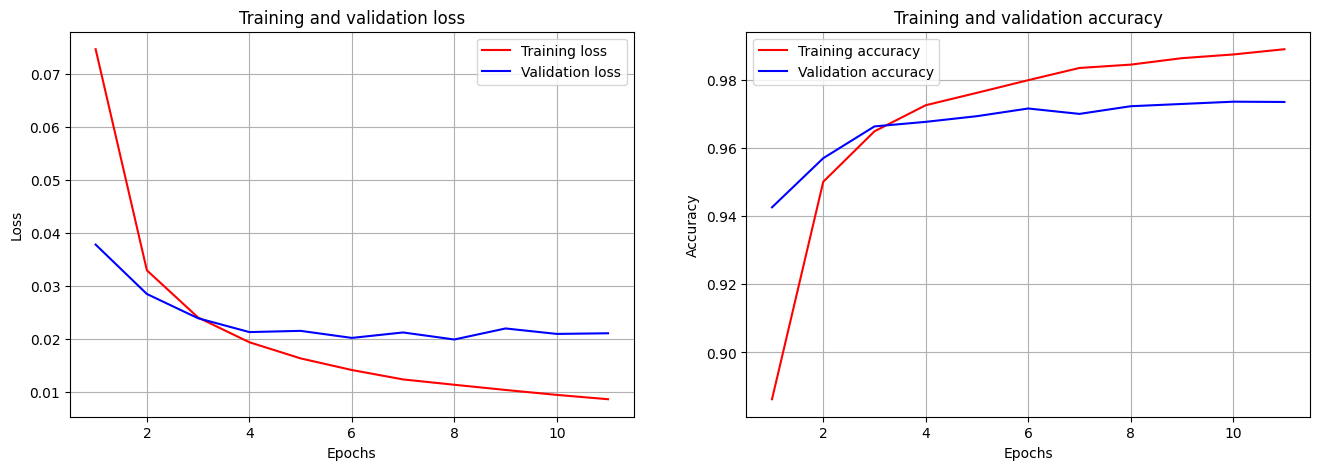

In [42]:
#Displaying evaluation parameters against epochs
plt.figure(figsize=(16 , 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()